In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Iris dataset

In [14]:
iris = datasets.load_iris()

# Convert to a DataFrame

In [15]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display first few rows

In [16]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# Create Scatter plots for feature Pairs
## Generate all possible scatter plots

### 1.Add species to the DataFrame for better visualization
### 2.Species are labeled as 0, 1, or 2
``` ['setosa', 'versicolor', 'virginica']```
### 3.Convert to names
### 4.Use seaborn’s pairplot with hue (color by species)

### 5. Save Image

<Figure size 1000x800 with 0 Axes>

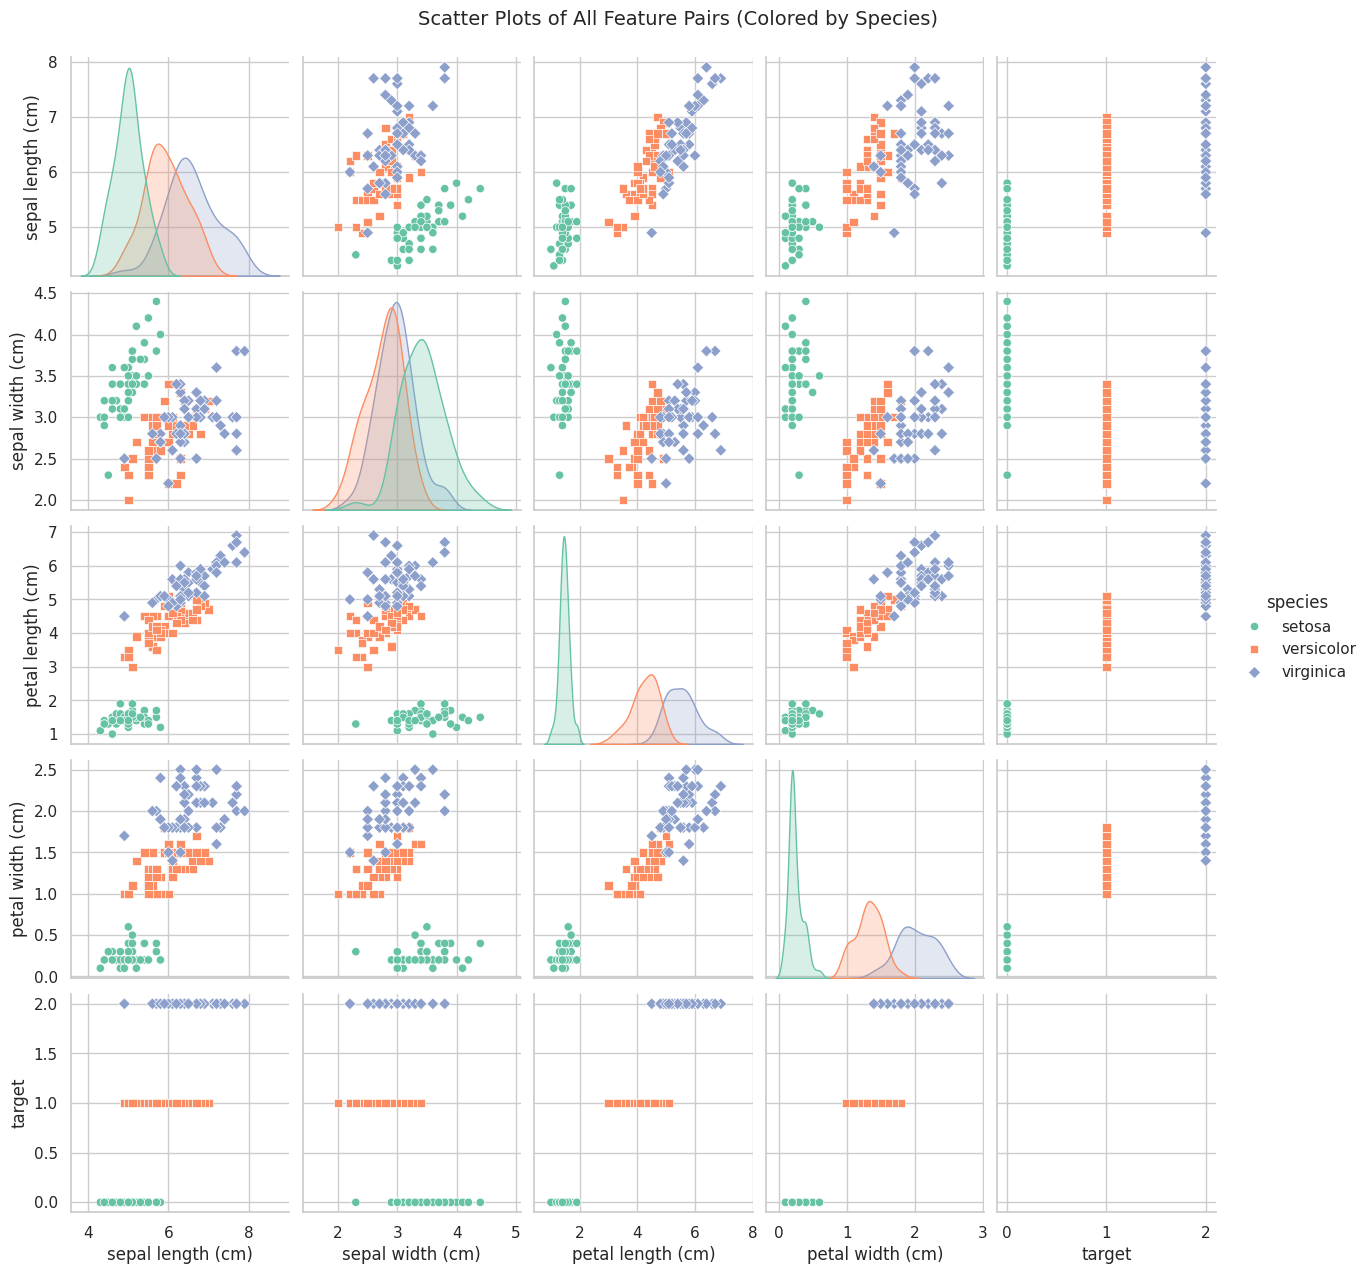

In [17]:
save_path = '/content/drive/My Drive/scatter_plots_all_features.png'

df['species'] = iris.target
species_names = iris.target_names
df['species'] = df['species'].apply(lambda x: species_names[x])

plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="species", palette="Set2", markers=["o", "s", "D"])

# Add title for clarity
plt.savefig(save_path)
plt.suptitle("Scatter Plots of All Feature Pairs (Colored by Species)", y=1.02, fontsize=14)
plt.show()

## Compute Correlation

### Compute the correlation matrix (excluding the 'species' column)

### Display the correlation matrix

In [18]:
correlation_matrix = df.drop('species', axis=1).corr()

# Display the correlation matrix
print("Correlation matrix:\n")
print(correlation_matrix)

Correlation matrix:

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


## Find the Strongest Positive Correlation

### Unstack and sort the correlations to find the strongest pair
### Remove self-correlations
### Take absolute value to identify the strongest relationship (optional)
``` correlations = correlations.abs()```

### Sort and get the pair with the highest positive correlation



In [19]:
correlations = correlation_matrix.unstack()

correlations = correlations[correlations < 1]

strongest_pair = correlations.sort_values(ascending=False).idxmax()
highest_corr_value = correlations[strongest_pair]

print(f"\nStrongest positively correlated pair: {strongest_pair}")
print(f"Correlation value: {highest_corr_value:.2f}")



Strongest positively correlated pair: ('petal width (cm)', 'petal length (cm)')
Correlation value: 0.96


## Plot the Strongest Correlated Feature Pair

### Extract the two feature
### Plot with species coloring
### Add labels and title

### Save the image

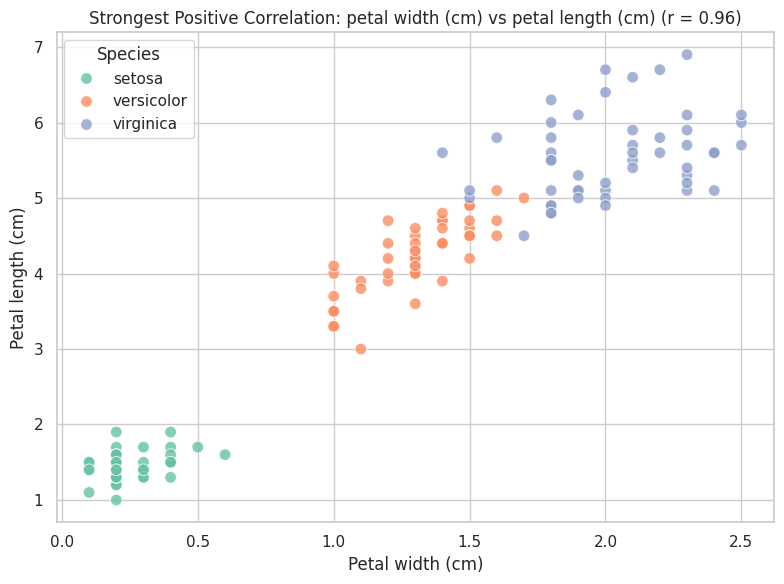

Plot saved to: /content/drive/My Drive/iris_strongest_correlation_plot.png


In [20]:
save_path = '/content/drive/My Drive/iris_strongest_correlation_plot.png'
feature_x, feature_y = strongest_pair

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='species', palette='Set2', s=70, alpha=0.8)

plt.xlabel(feature_x.capitalize())
plt.ylabel(feature_y.capitalize())
plt.title(f"Strongest Positive Correlation: {feature_x} vs {feature_y} (r = {highest_corr_value:.2f})")
plt.grid(True)
plt.legend(title='Species')
plt.tight_layout()
plt.savefig(save_path)
plt.show()

print(f"Plot saved to: {save_path}")
